In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import os

In [61]:
os.chdir("D:\\meridianthe4\\PML\\Datasets")

In [62]:
boston = pd.read_csv("Boston.csv")

In [63]:
X = boston.drop('medv', axis=1)
y = boston[['medv']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [64]:
scl_x, scl_y = MinMaxScaler(), MinMaxScaler()
X_train_scaled, y_train_scaled = scl_x.fit_transform(X_train), scl_y.fit_transform(y_train)
X_test_scaled, y_test_scaled = scl_x.transform(X_test), scl_y.transform(y_test)

### Single Layer Perceptron

In [65]:
initializer = tf.keras.initializers.GlorotUniform(seed=25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scaled.shape[1],)),
                             tf.keras.layers.Dense(1, kernel_initializer=initializer)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2253 - val_loss: 0.0963
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0762 - val_loss: 0.0503
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - val_loss: 0.0399
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - val_loss: 0.0351
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - val_loss: 0.0314
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330 - val_loss: 0.0284
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - val_loss: 0.0258
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - val_loss: 0.0237
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0219
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - val_loss: 0.0204
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - val_loss: 0.0192
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - val_l

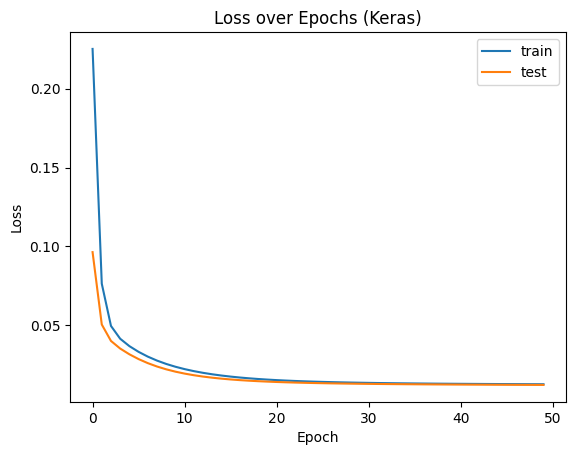

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs (Keras)')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [67]:
y_pred = scl_y.inverse_transform(model.predict(X_test_scaled))
r2_score(y_test, y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


0.678236722946167

In [68]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (68.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Multi Layer Perceptron

In [69]:
initializer = tf.keras.initializers.GlorotUniform(seed=25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scaled.shape[1],)),
                             tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initializer),
                             tf.keras.layers.Dense(1, kernel_initializer=initializer)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0530 - val_loss: 0.0953
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - val_loss: 0.0506
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.0404
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - val_loss: 0.0355
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250 - val_loss: 0.0318
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0291
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - val_loss: 0.0273
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - val_loss: 0.0253
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 - val_loss: 0.0237
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 - val_loss: 0.0226
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - val_loss: 0.0200
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - val_l

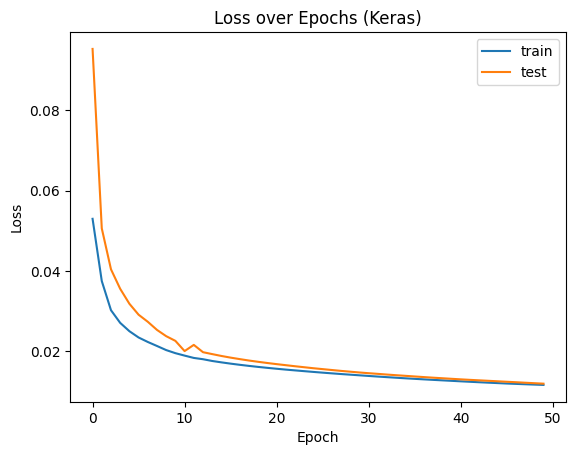

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs (Keras)')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [71]:
y_pred = scl_y.inverse_transform(model.predict(X_test_scaled))
r2_score(y_test, y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


0.6803681254386902

In [72]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### 2 Hidden Layers

In [73]:
initializer = tf.keras.initializers.GlorotUniform(seed=25)
tf.random.set_seed(25)
model = tf.keras.Sequential([tf.keras.Input(shape=(X_train_scaled.shape[1],)),
                             tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initializer),
                             tf.keras.layers.Dense(5, activation='relu', kernel_initializer=initializer),
                             tf.keras.layers.Dense(1, kernel_initializer=initializer)])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0716 - val_loss: 0.0362
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0427 - val_loss: 0.0278
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0328 - val_loss: 0.0229
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277 - val_loss: 0.0205
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - val_loss: 0.0191
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - val_loss: 0.0179
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.0179
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0210 - val_loss: 0.0171
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0161
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - val_loss: 0.0168
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - val_loss: 0.0163
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_l

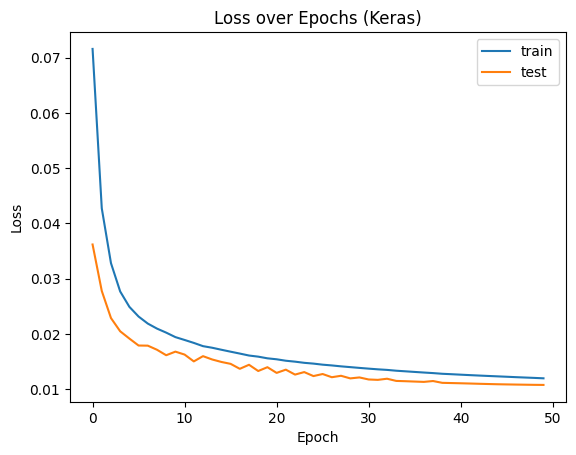

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs (Keras)')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [75]:
y_pred = scl_y.inverse_transform(model.predict(X_test_scaled))
r2_score(y_test, y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


0.7109413146972656

In [76]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203 (816.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)